# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

* Applicants with good salary
* Applicants with collateral
* Applicants in good standing with the bank (loyal and trustworthy)
* Applicants with less dependents

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [3]:
df.shape

(614, 13)

In [4]:
df.isna().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
cat_columns = ['Self_Employed','Dependents','Loan_Amount_Term','Gender','Married','Education','Property_Area']
num_columns = ['LoanAmount','ApplicantIncome','CoapplicantIncome']

Look at some basic statistics for numerical variables.

In [6]:
df[num_columns].describe()

,LoanAmount,ApplicantIncome,CoapplicantIncome
count,592.000000,614.000000,614.000000
mean,146.412162,5403.459283,1621.245798
std,85.587325,6109.041673,2926.248369
min,9.000000,150.000000,0.000000
25%,100.000000,2877.500000,0.000000
50%,128.000000,3812.500000,1188.500000
75%,168.000000,5795.000000,2297.250000
max,700.000000,81000.000000,41667.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [13]:
100*df[(df.Credit_History==0)&(df.Loan_Status=='Y')].Loan_Status.count()/(df[(df.Credit_History==0)].Loan_Status.count())

7.865168539325842

In [14]:
100*df[(df.Credit_History==0)&(df.Loan_Status=='N')].Loan_Status.count()/(df[(df.Credit_History==0)].Loan_Status.count())

92.13483146067416

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.




Look at box plots to understand the distributions. 

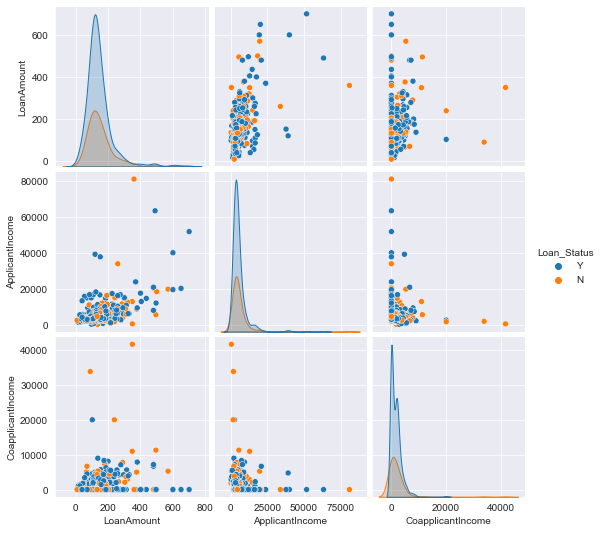

In [17]:
#Applicant income and loan amount requested are correlated
sns.pairplot(data=df,x_vars=num_columns,y_vars=num_columns,hue='Loan_Status')

Look at the distribution of income segregated  by `Education`

Look at the histogram and boxplot of LoanAmount

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [21]:
df.isna().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

D:\Anaconda\envs\geo_env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.

D:\Anaconda\envs\geo_env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.



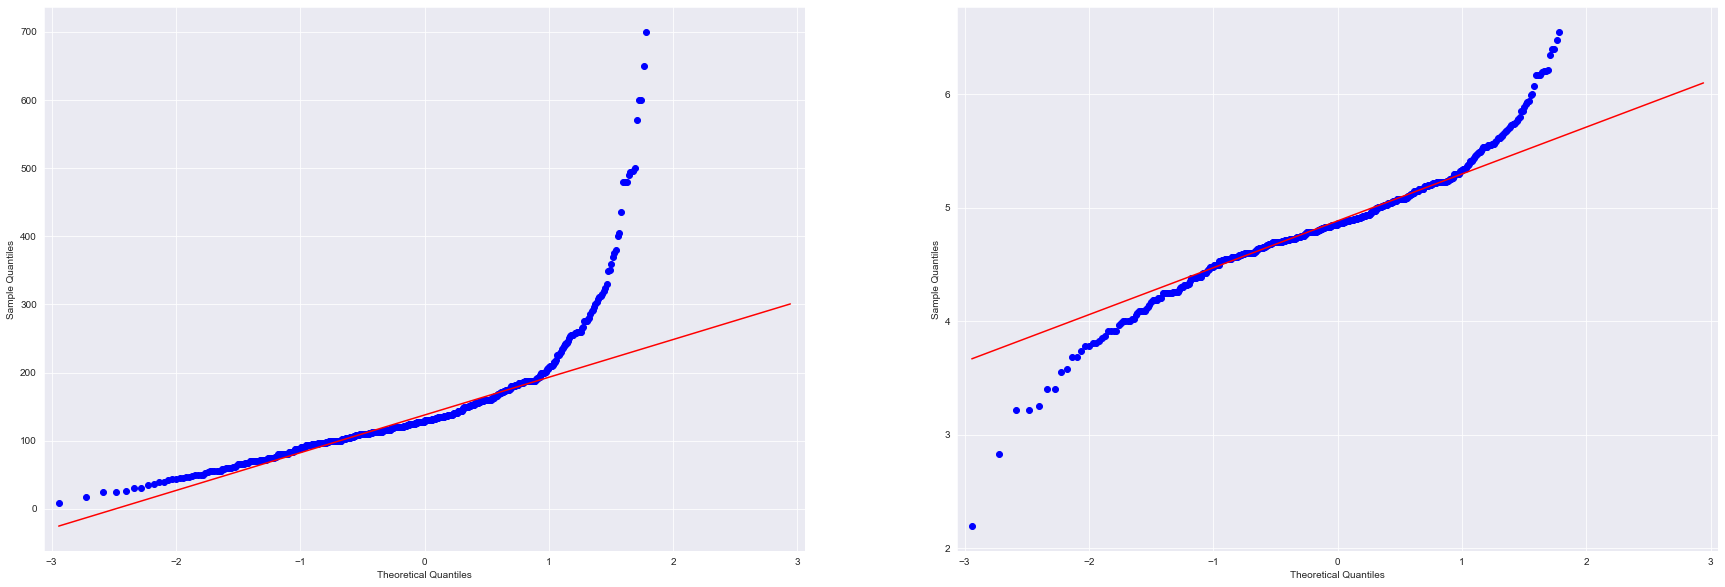

In [24]:
fig,axs = plt.subplots(1,2)
sm.qqplot(df.LoanAmount,line="q",ax=axs[0])
sm.qqplot(np.log(df.LoanAmount),line="q",ax=axs[1])
plt.show()

D:\Anaconda\envs\geo_env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.

D:\Anaconda\envs\geo_env\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning:

marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.



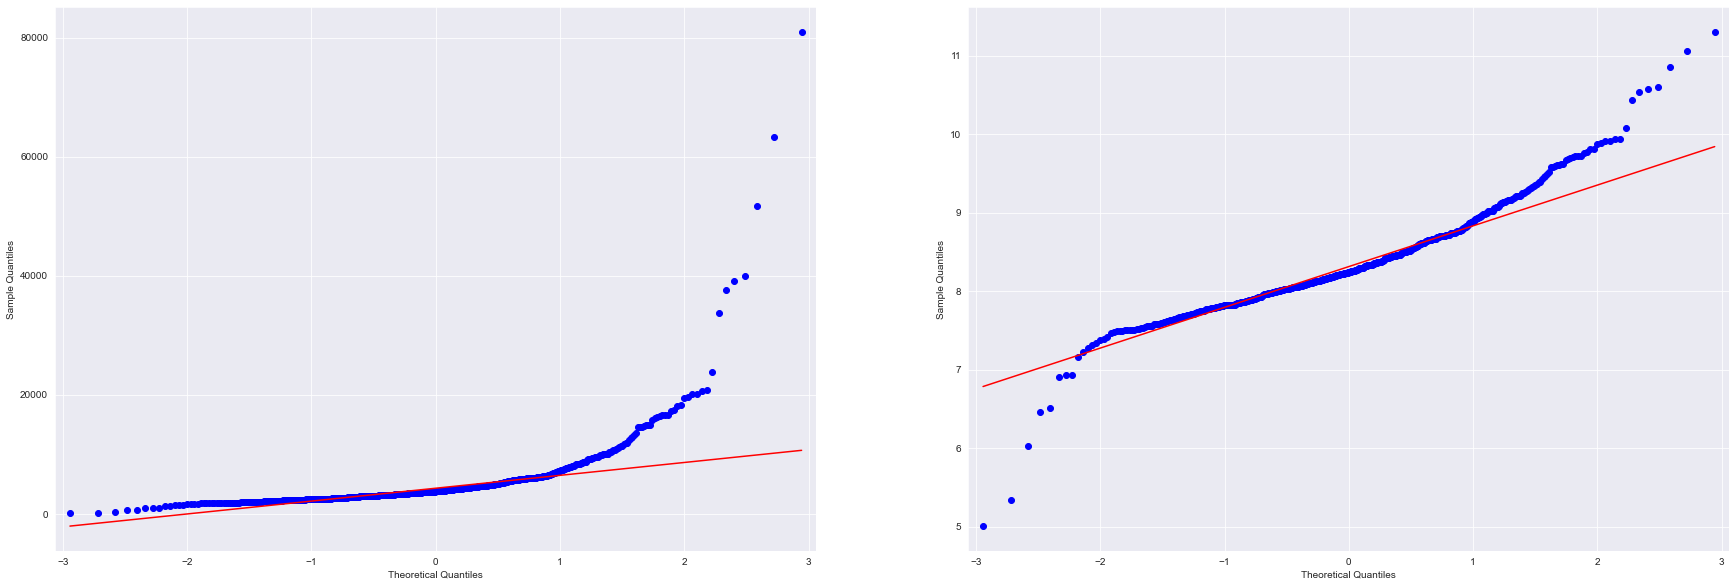

In [25]:
fig,axs = plt.subplots(1,2)
sm.qqplot(df.ApplicantIncome,line="q",ax=axs[0])
sm.qqplot(np.log(df.ApplicantIncome),line="q",ax=axs[1])
plt.show()

In [26]:
df.LoanAmount = np.log(df.LoanAmount)
df["TotalApplicantIncome"] = np.log(df.ApplicantIncome+df.CoapplicantIncome)
df.ApplicantIncome = np.log(df.ApplicantIncome)

In [27]:
df.drop(columns=['CoapplicantIncome','Loan_ID'],inplace=True)

In [729]:
df_dropped = df.drop(columns=['Loan_Amount_Term']) 

In [1121]:
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.preprocessing import OrdinalEncoder

In [1219]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score

In [766]:
from sklearn.compose import ColumnTransformer

In [1231]:
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import OneHotEncoder

In [1140]:
from sklearn.preprocessing import FunctionTransformer

In [1122]:
class CustomOrdinalEncoder(BaseEstimator,TransformerMixin):
    '''
    Converts categories into numbers for KNNImputing
    '''
    
    def __init__(self,feature_name=None):
        self.ord_encoder = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=1001)
        self.feature = feature_name
    
    def fit(self,X,y=None):
        na_indices = X[X.isna()].index.values
        not_na_rows = X[X.notna()]
        not_na_np = not_na_rows.to_numpy().reshape(-1,1)
        self.ord_encoder = self.ord_encoder.fit(not_na_np)
        return self
    
    def transform(self,X,y=None):
        na_indices = X[X.isna()].index.values
        not_na_rows = X[X.notna()]
        not_na_np = not_na_rows.to_numpy().reshape(-1,1)
        transformed_data = self.ord_encoder.transform(not_na_np)
        not_na_encode = pd.Series(transformed_data.flatten(),index = not_na_rows.index.values)
        return not_na_encode
    
    def inverse_transform(self,X,y=None):
        col = X.to_numpy().reshape(-1,1)
        return self.ord_encoder.inverse_transform(col)

In [1123]:
cat_columns = ['Self_Employed',
 'Dependents',
#  'Loan_Amount_Term',
 'Gender',
 'Married',
 'Education',
 'Property_Area',
 'Credit_History']

In [1124]:
X_train.shape

(368, 10)

In [1204]:
X_train,X_test,y_train,y_test = train_test_split(df_dropped.drop(columns=['Loan_Status']),df_dropped['Loan_Status'],stratify=df_dropped['Loan_Status'],random_state=123,train_size=0.6)

In [1205]:
X_train = X_train.sort_index()
y_train = y_train.sort_index()
X_test = X_test.sort_index()
y_test = y_test.sort_index()

In [1206]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Credit_History,Property_Area,TotalApplicantIncome
0,Male,No,0,Graduate,No,8.674026,NaN,1.0,Urban,8.674026
1,Male,Yes,1,Graduate,No,8.430109,4.852030,1.0,Rural,8.714568
4,Male,No,0,Graduate,No,8.699515,4.948760,1.0,Urban,8.699515
6,Male,Yes,0,Not Graduate,No,7.754910,4.553877,1.0,Urban,8.255569
11,Male,Yes,2,Graduate,NaN,7.824046,4.691348,1.0,Urban,8.375630


In [1207]:
ordinal_encoders = []

for feature in cat_columns:
    encoder = CustomOrdinalEncoder(feature_name=feature)
    encoder = encoder.fit(X_train[feature])
    ordinal_encoders.append(encoder)
    X_train.loc[:,feature] = encoder.transform(X_train[feature])
    X_test.loc[:,feature] = encoder.transform(X_test[feature])

In [1208]:
X_train[cat_columns].sort_index().head()

,Self_Employed,Dependents,Gender,Married,Education,Property_Area,Credit_History
0,0.0,0.0,1.0,0.0,0.0,2.0,1.0
1,0.0,1.0,1.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,2.0,1.0
6,0.0,0.0,1.0,1.0,1.0,2.0,1.0
11,NaN,2.0,1.0,1.0,0.0,2.0,1.0


In [1209]:
scaler = MinMaxScaler()
X_train.loc[:,num_columns] = scaler.fit_transform(X_train.loc[:,num_columns])
X_test.loc[:,num_columns] = scaler.transform(X_test.loc[:,num_columns])

In [1210]:
X_train[num_columns].sort_index().head()

,LoanAmount,ApplicantIncome,TotalApplicantIncome
0,NaN,0.605961,0.370195
1,0.609760,0.565615,0.380913
4,0.631977,0.610177,0.376934
6,0.541279,0.453930,0.259563
11,0.572854,0.465366,0.291305


In [1211]:
imputer = KNNImputer(n_neighbors=1,) #impute with values from nearest neighbour
X_train = pd.DataFrame(imputer.fit_transform(X_train),columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test),columns=X_test.columns)

In [1212]:
# for feature,encoder in zip(cat_columns,ordinal_encoders):
#     X_train.loc[:,feature] = encoder.inverse_transform(X_train[feature])
#     X_test.loc[:,feature] = encoder.inverse_transform(X_test[feature])
    

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

In [1213]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Credit_History,Property_Area,TotalApplicantIncome
0,1.0,0.0,0.0,0.0,0.0,0.605961,0.631977,1.0,2.0,0.370195
1,1.0,1.0,1.0,0.0,0.0,0.565615,0.609760,1.0,0.0,0.380913
2,1.0,0.0,0.0,0.0,0.0,0.610177,0.631977,1.0,2.0,0.376934
3,1.0,1.0,0.0,1.0,0.0,0.453930,0.541279,1.0,2.0,0.259563
4,1.0,1.0,2.0,0.0,0.0,0.465366,0.572854,1.0,2.0,0.291305


Combine both incomes as total income and take a log transformation of the same.

In [1214]:
X_train = pd.get_dummies(data=X_train,columns=cat_columns)
X_test = pd.get_dummies(data=X_test,columns=cat_columns)

In [1216]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)

In [1217]:
y_test = label_encoder.transform(y_test)

## 4. Building a Predictive Model

In [1221]:
params = {
#     'C':[0.05,0.5,0.8,1,1.5]
}

In [1222]:
clf = LogisticRegression(fit_intercept=True,random_state=123,max_iter=1000)
model = GridSearchCV(clf,param_grid=params)

In [1223]:
model = model.fit(X_train,y_train)

In [1224]:
model.score(X_train,y_train)

0.8179347826086957

In [1225]:
# model.score(X_test,y_test)

In [1226]:
f1_score(y_test,model.predict(X_test))

0.8608923884514436

In [1227]:
f1_score(y_train,model.predict(X_train))

0.8784029038112523

Try paramater grid search to improve the results

In [759]:
from sklearn.ensemble import RandomForestClassifier

In [760]:
params = {
    'n_estimators':[50,100,150,300],
    'max_depth': [2,3,4,5],
}

In [761]:
forest_clf = RandomForestClassifier()
forest_model= GridSearchCV(forest_clf,param_grid=params)

In [762]:
forest_model.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'n_estimators': [50, 100, 150, 300]})

In [763]:
f1_score(y_test,forest_model.predict(X_test))

0.8616187989556137

In [764]:
f1_score(y_train,forest_model.predict(X_train))

0.8824593128390598

In [159]:
import xgboost as xgb

In [184]:
params = {
    'n_estimators':[50,100,150,300],
    'max_depth': [1,2,3],
    'learning_rate':[0.05,0.1,0.3,0.5]
}

In [185]:
xgb_clf = xgb.XGBClassifier(use_label_encoder=False,eval_metric='logloss')
xgb_model = GridSearchCV(xgb_clf,param_grid=params)

In [186]:
# xgb_model.fit(X_train,y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
             

In [187]:
# xgb_model.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=150, n_jobs=12,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [188]:
# f1_score(y_test,xgb_model.predict(X_test))

0.776

In [189]:
# f1_score(y_train,xgb_model.predict(X_train))

0.8847352024922118

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [767]:
df.LoanAmount = np.log(df.LoanAmount)
df["TotalApplicantIncome"] = np.log(df.ApplicantIncome+df.CoapplicantIncome)
df.ApplicantIncome = np.log(df.ApplicantIncome)

AttributeError: 'DataFrame' object has no attribute 'CoapplicantIncome'

In [768]:
df.drop(columns=['CoapplicantIncome','Loan_ID','Loan_Amount_Term'],inplace=True)

KeyError: "['CoapplicantIncome' 'Loan_ID'] not found in axis"

In [1233]:
cat_columns = ['Self_Employed',
 'Dependents',
#  'Loan_Amount_Term',
 'Gender',
 'Married',
 'Education',
 'Property_Area',
 'Credit_History']

num_columns = ['LoanAmount','ApplicantIncome','TotalApplicantIncome']

In [1234]:
class PipeCustomOrdinalEncoder(BaseEstimator,TransformerMixin):
    '''
    Converts categories into numbers for KNNImputing
    '''
    
    def __init__(self):
        self.ord_encoder = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=1001)
#         self.feature = feature_name
    
    def fit(self,X,y=None):
        na_indices = X[X.isna()].index.values
        not_na_rows = X[X.notna()]
        not_na_np = not_na_rows.to_numpy().reshape(-1,1)
        self.ord_encoder = self.ord_encoder.fit(not_na_np)
        return self
    
    def transform(self,X,y=None):
        na_indices = X[X.isna()].index.values
        not_na_rows = X[X.notna()]
        not_na_np = not_na_rows.to_numpy().reshape(-1,1)
        transformed_data = self.ord_encoder.transform(not_na_np)
        not_na_encode = pd.Series(transformed_data.flatten(),index = not_na_rows.index.values)
        return pd.DataFrame(pd.concat([not_na_encode,X[X.isna()]]).sort_index())
    
    def inverse_transform(self,X,y=None):
        col = X.to_numpy().reshape(-1,1)
        return self.ord_encoder.inverse_transform(col)

In [1235]:
# from joblib import Parallel, delayed
# from sklearn.pipeline import FeatureUnion, _fit_transform_one, _transform_one
# from scipy import sparse


# class PandasFeatureUnion(FeatureUnion):
#     def fit_transform(self, X, y=None, **fit_params):
#         self._validate_transformers()
#         result = Parallel(n_jobs=self.n_jobs)(
#             delayed(_fit_transform_one)(
#                 transformer=trans,
#                 X=X,
#                 y=y,
#                 weight=weight,
#                 **fit_params)
#             for name, trans, weight in self._iter())

#         if not result:
#             # All transformers are None
#             return np.zeros((X.shape[0], 0))
#         Xs, transformers = zip(*result)
#         self._update_transformer_list(transformers)
#         if any(sparse.issparse(f) for f in Xs):
#             Xs = sparse.hstack(Xs).tocsr()
#         else:
#             Xs = self.merge_dataframes_by_column(Xs)
#         return Xs

#     def merge_dataframes_by_column(self, Xs):
#         return pd.concat(Xs, axis="columns", copy=False)

#     def transform(self, X):
#         Xs = Parallel(n_jobs=self.n_jobs)(
#             delayed(_transform_one)(
#                 transformer=trans,
#                 X=X,
#                 y=None,
#                 weight=weight)
#             for name, trans, weight in self._iter())
#         if not Xs:
#             # All transformers are None
#             return np.zeros((X.shape[0], 0))
#         if any(sparse.issparse(f) for f in Xs):
#             Xs = sparse.hstack(Xs).tocsr()
#         else:
#             Xs = self.merge_dataframes_by_column(Xs)
#         return Xs

In [1236]:
class CustomKNNImputer():
    
    def __init__(self,n_neighbors):
        self.imputer = KNNImputer(n_neighbors=n_neighbors)
    
    def fit(self,X,y=None):
        self.imputer = self.imputer.fit(X)
        return self.imputer 
    
    def transform(self,X,y=None):
        return pd.DataFrame(self.imputer.transform(X),columns=X.columns)
    
    def fit_transform(self,X,y=None):
        self.imputer = self.imputer.fit(X)
        return self.transform(X,y)
    

In [1237]:
cat_preprocess = ColumnTransformer(transformers=[
    ('employed',PipeCustomOrdinalEncoder(),'Self_Employed'),
    ('dependents',PipeCustomOrdinalEncoder(),'Dependents'),
#     ('loan_amount',CustomOrdinalEncoder(),'Loan_Amount_Term'),
    ('married',PipeCustomOrdinalEncoder(),'Married'),
    ('gender',PipeCustomOrdinalEncoder(),'Gender'),
    ('education',PipeCustomOrdinalEncoder(),'Education'),
    ('property',PipeCustomOrdinalEncoder(),'Property_Area'),
    ('credit-history',PipeCustomOrdinalEncoder(),'Credit_History')
                                                ])

categories = Pipeline(steps=[
    ('cat',cat_preprocess),
    ('cat_names',FunctionTransformer(lambda x: pd.DataFrame(x,columns=cat_columns)))
])

num_preprocess = ColumnTransformer(
transformers=[
    ('num_scaling',MinMaxScaler(),num_columns)
])

numerical = Pipeline(steps=[
    ('num',num_preprocess),
    ('num_names',FunctionTransformer(lambda x: pd.DataFrame(x,columns=num_columns)))
])

impute_preprocess = Pipeline(steps=[
    ('feature_union',FeatureUnion(transformer_list=[
        ('cat_pipe',categories),
        ('num_pipe',numerical)
    ])),
    ('test',FunctionTransformer(lambda x: pd.DataFrame(x,columns=cat_columns+num_columns))),
    ('imputer',CustomKNNImputer(n_neighbors=1,))
])

one_hot_encoding_preprocess = FeatureUnion(transformer_list=[
        ('cat_features',ColumnTransformer(
            transformers=[('categorical',OneHotEncoder(),cat_columns),]
        )),
        ('num_features',ColumnTransformer(
            transformers=[('numeric','passthrough',num_columns),]
        ))
    ])

preprocessing = Pipeline(steps=[
    ('impute',impute_preprocess),
    ('one_hot_encoded',one_hot_encoding_preprocess)
])

pipe = Pipeline(steps=[
    ('preprocess',preprocessing),
    ('model',LogisticRegression(random_state=123,fit_intercept=True,max_iter=1000))
],verbose=True)



In [1238]:
X_train,X_test,y_train,y_test = train_test_split(df_dropped.drop(columns=['Loan_Status']),df_dropped['Loan_Status'],stratify=df_dropped['Loan_Status'],random_state=68,train_size=0.7)

In [1239]:
X_train = X_train.sort_index()
y_train = y_train.sort_index()
X_test = X_test.sort_index()
y_test = y_test.sort_index()

In [1240]:
training_indices = X_train.index.values
testing_indices = X_test.index.values
# training_indices

In [1241]:
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

In [1244]:
model = GridSearchCV(pipe,param_grid=params)
model = model.fit(X_train,y_train)

[Pipeline] ........ (step 1 of 2) Processing preprocess, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s
[Pipeline] ........ (step 1 of 2) Processing preprocess, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s
[Pipeline] ........ (step 1 of 2) Processing preprocess, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s
[Pipeline] ........ (step 1 of 2) Processing preprocess, total=   0.2s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s
[Pipeline] ........ (step 1 of 2) Processing preprocess, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s
[Pipeline] ........ (step 1 of 2) Processing preprocess, total=   0.1s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s


In [1245]:
f1_score(y_train,model.predict(X_train))

0.8715596330275229

In [1246]:
f1_score(y_test,model.predict(X_test))

0.8551236749116607

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python